### Exercício 3:
Em 30-Jun-2015 vários traders compraram opções de compra de USD (venda de BRL) ATMF para diferentes
prazos. Use os dados anexos, interpolação linear para spot e forwards, e a interpolação adequada para vols
ATMF (vol forward constante, variância efetiva é a soma das variâncias efetivas) para estimar os resultados
finais e perdas máximas de cada um dos traders.

Primeiro importamos os métodos e dados criados para a prova:

In [1]:
from __future__ import division
import datetime
import base
import pandas as pd
%matplotlib inline

#### a) O primeiro comprou uma opção de 1m e carregou sem hedge até o final.

Configurações iniciais:

In [2]:
phi=base.call
position=base.positionLong
tenor=1
includeHedge=0 # it will not include hedge in the cashflow
startDate = datetime.datetime.strptime('06/30/2015', '%m/%d/%Y')

Calculando o portfolio por data:

In [3]:
sa=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
pd.DataFrame({'Date':sa.index, 'Portfolio':sa.values})

Date   Portfolio
0   2015-06-30           0
1   2015-07-01   0.0231337
2   2015-07-02    -0.01039
3   2015-07-03   0.0075826
4   2015-07-06  0.00283377
5   2015-07-07   0.0363611
6   2015-07-08   0.0740696
7   2015-07-09   0.0672329
8   2015-07-10   0.0124885
9   2015-07-13 -0.00787674
10  2015-07-14 -0.00557087
11  2015-07-15 -0.00886685
12  2015-07-16 -0.00265345
13  2015-07-17   0.0173438
14  2015-07-20   0.0225729
15  2015-07-21  0.00158765
16  2015-07-22   0.0405652
17  2015-07-23    0.097815
18  2015-07-24    0.165528
19  2015-07-27    0.172112
20  2015-07-28    0.163652
21  2015-07-29    0.136893
22  2015-07-30    0.175341

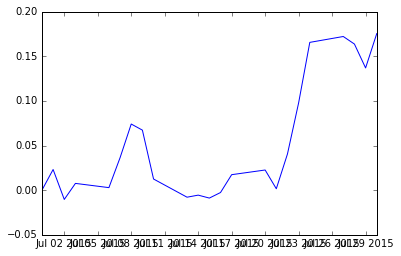

In [4]:
sa.plot()

Resultado final, perda máxima e quando foi a perda máxima:

In [5]:
pd.DataFrame([[sa[len(sa)-1], sa.min(), sa.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.175341      -0.01039        2015-07-02

#### b) O segundo comprou uma opção de 1m e fez o delta hedge até o final.

In [6]:
tenor=1
includeHedge=1 # include hedge in the cashflow
sb=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
pd.DataFrame({'Date':sb.index, 'Portfolio':sb.values})

Date   Portfolio
0   2015-06-30           0
1   2015-07-01   0.0448552
2   2015-07-02   -0.042815
3   2015-07-03   0.0255651
4   2015-07-06  0.00204168
5   2015-07-07   0.0644421
6   2015-07-08    0.108824
7   2015-07-09   0.0613577
8   2015-07-10  -0.0458384
9   2015-07-13  -0.0257724
10  2015-07-14  -0.0035104
11  2015-07-15 -0.00987811
12  2015-07-16  0.00678995
13  2015-07-17   0.0367083
14  2015-07-20   0.0273896
15  2015-07-21  -0.0183312
16  2015-07-22   0.0757589
17  2015-07-23    0.151727
18  2015-07-24     0.23212
19  2015-07-27    0.178636
20  2015-07-28    0.155115
21  2015-07-29    0.110064
22  2015-07-30    0.213699

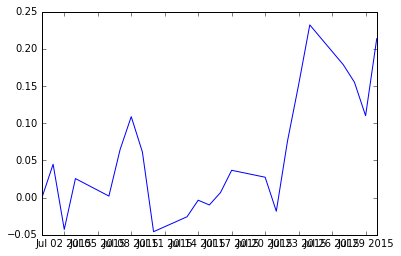

In [7]:
sb.plot()

In [8]:
pd.DataFrame([[sb[len(sb)-1], sb.min(), sb.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.213699     -0.045838        2015-07-10

#### c) O terceiro comprou uma opção de 3m e carregou sem hedge até o final:

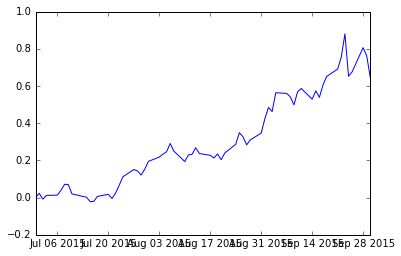

In [9]:
tenor=3
includeHedge=0
sc=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
sc.plot()

In [10]:
pd.DataFrame([[sc[len(sc)-1], sc.min(), sc.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.642843     -0.022334        2015-07-15

#### d) O quarto comprou uma opção de 3m e fez o delta hedge até o final

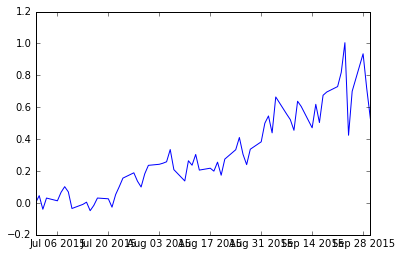

In [11]:
tenor=3
includeHedge=1
sd=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
sd.plot()

In [12]:
pd.DataFrame([[sd[len(sd)-1], sd.min(), sd.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.528677     -0.048645        2015-07-15

#### e) O quinto comprou uma opção de 12m e carregou sem hedge até o final

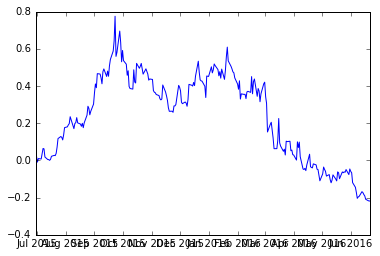

In [13]:
tenor=12
includeHedge=0
se=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
se.plot()

In [14]:
pd.DataFrame([[se[len(sd)-1], se.min(), se.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.530236     -0.219451        2016-06-22

#### f) O sexto comprou uma opção de 12m e fez o delta hedge até o final

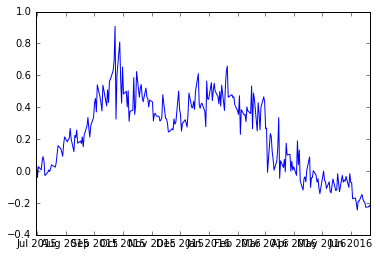

In [15]:
tenor=12
includeHedge=1
sf=base.calcPortfolio(phi, position, tenor, startDate, includeHedge)
sf.plot()

In [16]:
pd.DataFrame([[sf[len(sd)-1], sf.min(), sf.idxmin()]], \
             columns=['PnL Final','Perda Máxima','Data Perda Máxima'])

PnL Final  Perda Máxima Data Perda Máxima
0   0.425838     -0.244613        2016-06-08